In [1]:
# Importar las Libraries necesarias para el desarrollo

# Sistema Operativo
import warnings
import re
import os
warnings.filterwarnings("ignore")
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
import datetime as dt
import seaborn as sns

# Ml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
# Establecer estilo visualización
sns.set_style("darkgrid")

# Establecer vista de decimales
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Cargar los datos con la ruta de archivo excel
df = pd.read_csv("data/rfm.csv")


# Vista previa
df.head()


,Unnamed: 0,customer_id,recency,monetary,ontime_avg,is_graduated_last,is_kam_last,microzona_last,birthday,last_order,frequency,R,F,M,RFM_Score,stock_seguridad,umbral_churn,churned,Segment,customer_duration,LTV
0,0,1,16,42.24,1.00,True,False,149.00,2021-09-17,<built-in method date of Timestamp object at 0...,3,3,2,2,7,0.75,3.75,True,Clientes Churneados,697 days,126.72
1,1,2,1,84.17,1.00,True,False,121.00,2021-04-09,<built-in method date of Timestamp object at 0...,9,5,3,4,12,2.25,11.25,False,Clientes Leales,873 days,757.55
2,2,3,1,63.49,0.94,True,False,120.00,2021-01-08,<built-in method date of Timestamp object at 0...,17,5,4,3,12,4.25,21.25,False,Clientes Leales,964 days,1079.38
3,3,4,5,77.52,1.00,False,False,635.00,2022-03-31,<built-in method date of Timestamp object at 0...,13,4,4,4,12,3.25,16.25,False,Clientes Leales,513 days,1007.73
4,4,5,2,157.33,0.98,False,False,347.00,2022-10-07,<built-in method date of Timestamp object at 0...,20,4,5,5,14,5.00,25.00,False,Clientes VIP,326 days,3146.50


## Eliminar columnas redundantes o innecesarias

Dado que en las reuniones se hablo de la importancia de usar las ofensas a los comercios como los indicadores y que reutilizar las etiquetas que se usaron para definir que alguien está o no en churn se proceden a eliminar algunas etiquetas del modelo de predicción.

In [2]:
# Eliminar columnas innecesarias
cols_to_drop = ['Unnamed: 0', 'customer_id', 'last_order', 'recency', 'frequency', 'monetary','R','F','M' ,'RFM_Score', 'Segment', 'customer_duration','stock_seguridad','umbral_churn' ,'LTV']
df_clean = df.drop(columns=cols_to_drop)

# Convertir 'birthday' a edad del cliente
df_clean['birthday'] = pd.to_datetime(df_clean['birthday'])
df_clean['age'] = (datetime.now() - df_clean['birthday']).dt.days / 365.25
df_clean = df_clean.drop(columns='birthday')



### Volver microzona un dato categorico

In [3]:
# Convertir 'microzona_last' a categórica
df_clean['microzona_last'] = df_clean['microzona_last'].astype('category')

# One-Hot Encoding para 'microzona_last'
df_clean = pd.get_dummies(df_clean, columns=['microzona_last'], drop_first=True)




## Split de data

In [4]:
# Dividir nuevamente el conjunto de datos en conjuntos de entrenamiento y prueba
X = df_clean.drop(columns='churned')
y = df_clean['churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.head()

,ontime_avg,is_graduated_last,is_kam_last,age,microzona_last_33.0,microzona_last_112.0,microzona_last_120.0,microzona_last_121.0,microzona_last_122.0,microzona_last_125.0,microzona_last_126.0,microzona_last_135.0,microzona_last_136.0,microzona_last_137.0,microzona_last_138.0,microzona_last_149.0,microzona_last_150.0,microzona_last_151.0,microzona_last_169.0,microzona_last_170.0,microzona_last_171.0,microzona_last_172.0,microzona_last_186.0,microzona_last_193.0,microzona_last_205.0,microzona_last_209.0,microzona_last_210.0,microzona_last_241.0,microzona_last_332.0,microzona_last_347.0,microzona_last_351.0,microzona_last_352.0,microzona_last_353.0,microzona_last_354.0,microzona_last_355.0,microzona_last_356.0,microzona_last_357.0,microzona_last_358.0,microzona_last_359.0,microzona_last_360.0,microzona_last_378.0,microzona_last_381.0,microzona_last_382.0,microzona_last_383.0,microzona_last_384.0,microzona_last_385.0,microzona_last_388.0,microzona_last_389.0,microzona_last_415.0,microzona_last_417.0,microzona_last_418.0,microzona_last_420.0,microzona_last_421.0,microzona_last_472.0,microzona_last_473.0,microzona_last_474.0,microzona_last_475.0,microzona_last_476.0,microzona_last_477.0,microzona_last_478.0,microzona_last_479.0,microzona_last_566.0,microzona_last_567.0,microzona_last_568.0,microzona_last_569.0,microzona_last_570.0,microzona_last_571.0,microzona_last_572.0,microzona_last_630.0,microzona_last_631.0,microzona_last_632.0,microzona_last_633.0,microzona_last_634.0,microzona_last_635.0,microzona_last_636.0,microzona_last_637.0,microzona_last_641.0,microzona_last_839.0,microzona_last_919.0,microzona_last_1188.0,microzona_last_1235.0,microzona_last_1252.0,microzona_last_1297.0,microzona_last_1298.0,microzona_last_1299.0,microzona_last_1335.0,microzona_last_1348.0,microzona_last_1351.0,microzona_last_1352.0,microzona_last_1368.0
5075,1.00,False,False,2.54,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6021,1.00,False,False,0.79,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2984,1.00,False,False,2.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7657,1.00,True,False,1.45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3434,0.96,True,False,1.76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Pipeline para Regresión Logística
pipeline_logreg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42))
])

# Pipeline para Random Forest
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Pipeline para SVM
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])


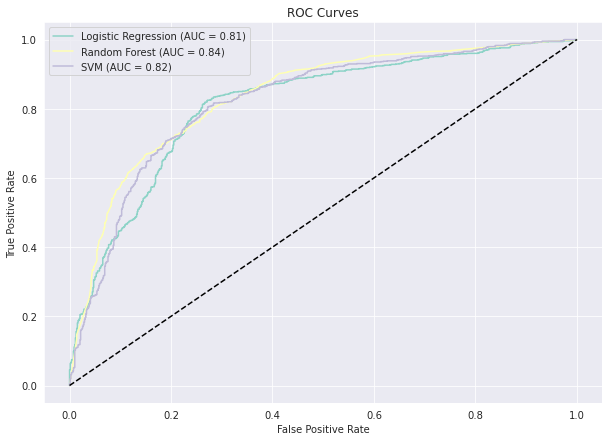

(0.8125444511136327, 0.8356181388291339, 0.8202159648684684)

In [6]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Entrenar los modelos
pipeline_logreg.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)

# Obtener las probabilidades de clase positiva para cada modelo
y_prob_logreg = pipeline_logreg.predict_proba(X_test)[:,1]
y_prob_rf = pipeline_rf.predict_proba(X_test)[:,1]
y_prob_svm = pipeline_svm.predict_proba(X_test)[:,1]

# Calcular ROC-AUC para cada modelo
roc_auc_logreg = roc_auc_score(y_test, y_prob_logreg)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
roc_auc_svm = roc_auc_score(y_test, y_prob_svm)

# Plotting ROC curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)

plt.figure(figsize=(10, 7))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

roc_auc_logreg, roc_auc_rf, roc_auc_svm


Este resultado es cuestionable por el tipo de construcción de las etiquetas y las pocas features incorporadas. Se exploran dos opciones,
primero cambiar el enfoque e intentar una caracterización y dashboards de seguiento en lugar de un modelo de predicción del churn. En otras palabras, crear un modelo multiclase para entender la probabilidad de caer en cada uno de los otros segmentos. Segundo, usar añadir otros features para la predicción